## 1. NumPy Operations

In [1]:
import numpy as np

a = np.array([1, 2, 3, 4, 5])
b = np.array([10, 20, 30, 40, 50])

print(a + b)   
print(b / a)   
print(b % a)  
print(b == 20) 
print(np.sqrt(a))

big_array = np.arange(1_000_000)

%timeit [x ** 2 for x in big_array]
%timeit big_array ** 2

[11 22 33 44 55]
[10. 10. 10. 10. 10.]
[0 0 0 0 0]
[False  True False False False]
[1.         1.41421356 1.73205081 2.         2.23606798]
54 ms ± 379 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
752 μs ± 42.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 2. Pandas Basics

In [2]:
import pandas as pd

df = pd.read_csv('../data/starter_data.csv')
df.info(); df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05


## 3. Summary Statistics

In [3]:
df.describe()

,value
count,10.000000
mean,17.600000
std,7.381659
min,10.000000
25%,12.250000
50%,14.500000
75%,23.250000
max,30.000000


In [4]:
df_by_category = df.groupby('category')['value'].mean().reset_index()

df_by_category


,category,value
0,A,11.500000
1,B,15.666667
2,C,27.666667


## 4. Save Outputs

In [5]:
df_by_category.to_csv("../data/processed/summary.csv", index=False)

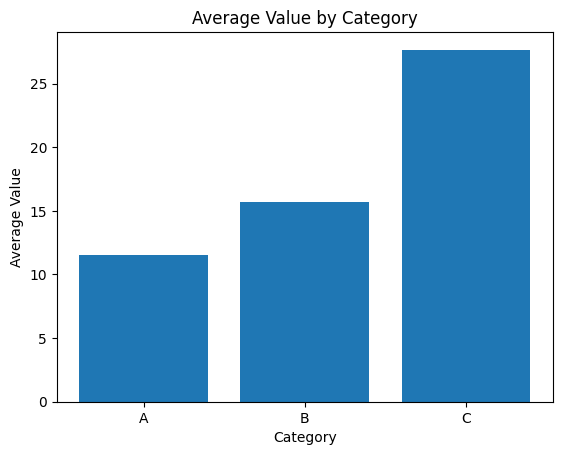

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt

plt.bar(df_by_category['category'], df_by_category['value'])
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.title('Average Value by Category')
plt.show()
plt.savefig("../data/processed/summary_plot.png")

## 5. Reusable functions

In [ ]:
import sys
import os

sys.path.append(os.path.abspath(".."))
from src.utils import get_summary_stats

get_summary_stats(df, 'category', 'value')

,category,count,mean,std,min,max
0,A,4,11.500000,1.290994,10,13
1,B,3,15.666667,2.081666,14,18
2,C,3,27.666667,2.516611,25,30
